<h2><p style="text-align: center;">Sprint 2</p></h2>

---

### Project 2: Lung Cancer Prediction

**Group 6:**   
Hamna Ashraf - 8826836\
John Prasad - 8976716\
Simardeep Singh - 8976948

### Required Libraries:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import plotly as px
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
import pickle
#plotly.offline.init_notebook_mode()

### Data Preprocessing:

In [2]:
df = pd.read_csv("./data/lung_cancer_mortality_data_large_v2.csv")

In [3]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   age                          float64
 2   gender                       object 
 3   country                      object 
 4   diagnosis_date               object 
 5   cancer_stage                 object 
 6   beginning_of_treatment_date  object 
 7   family_history               object 
 8   smoking_status               object 
 9   bmi                          float64
 10  cholesterol_level            int64  
 11  hypertension                 int64  
 12  asthma                       int64  
 13  cirrhosis                    int64  
 14  other_cancer                 int64  
 15  treatment_type               object 
 16  end_treatment_date           object 
 17  survived                     int64  
dtypes: float64(2), int64(7), object(9)
memory 

There are 18 features in our dataset and 3.25M entries.

In [5]:
print(df.describe())

                 id           age           bmi  cholesterol_level   
count  3.250000e+06  3.250000e+06  3.250000e+06       3.250000e+06  \
mean   1.625000e+06  5.499969e+01  3.049276e+01       2.336376e+02   
std    9.381943e+05  1.000122e+01  8.371494e+00       4.344851e+01   
min    1.000000e+00  4.000000e+00  1.600000e+01       1.500000e+02   
25%    8.125008e+05  4.800000e+01  2.320000e+01       1.960000e+02   
50%    1.625000e+06  5.500000e+01  3.050000e+01       2.420000e+02   
75%    2.437500e+06  6.200000e+01  3.770000e+01       2.710000e+02   
max    3.250000e+06  1.040000e+02  4.500000e+01       3.000000e+02   

       hypertension        asthma     cirrhosis  other_cancer      survived  
count  3.250000e+06  3.250000e+06  3.250000e+06  3.250000e+06  3.250000e+06  
mean   7.498375e-01  4.687280e-01  2.265831e-01  8.802738e-02  2.196006e-01  
std    4.331065e-01  4.990212e-01  4.186206e-01  2.833348e-01  4.139761e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000

In [6]:
#Let's check if there are any null values
df.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

This dataset has no missing values.

# EDA 

#### `Age distribution`

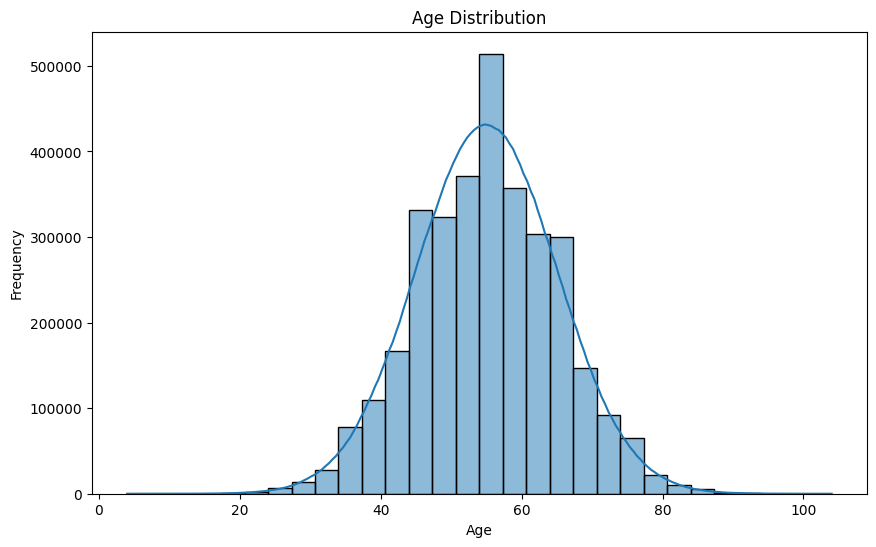

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



 Most common age range: Patients aged 50-70 years.

 Peak age: Around 60 years.

 Slight right skew, indicating a larger number of older patients.

In [8]:
print(df['country'].unique())

['Germany' 'Czech Republic' 'Romania' 'Latvia' 'Greece' 'Finland'
 'Denmark' 'France' 'Slovakia' 'Hungary' 'Estonia' 'Portugal' 'Croatia'
 'Netherlands' 'Austria' 'Poland' 'Lithuania' 'Italy' 'Belgium' 'Slovenia'
 'Ireland' 'Spain' 'Sweden' 'Bulgaria' 'Malta' 'Luxembourg' 'Cyprus']


The dataset we are using is for the countries listed above.

#### ` Gender distribution`

gender
Female    1625490
Male      1624510
Name: count, dtype: int64


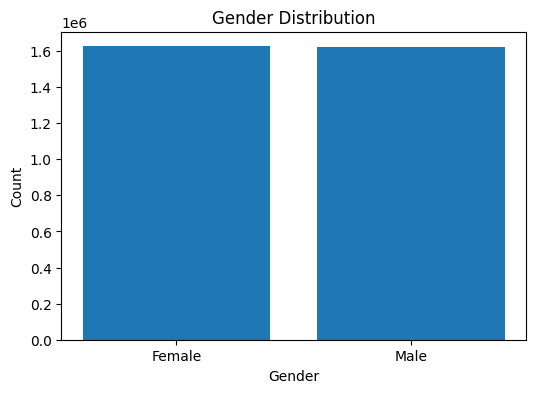

In [9]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


No  significant gender bias in this dataset, as both genders are almost equally represented.

#### `Distribution of Patient Survival`

survived
0    2536298
1     713702
Name: count, dtype: int64


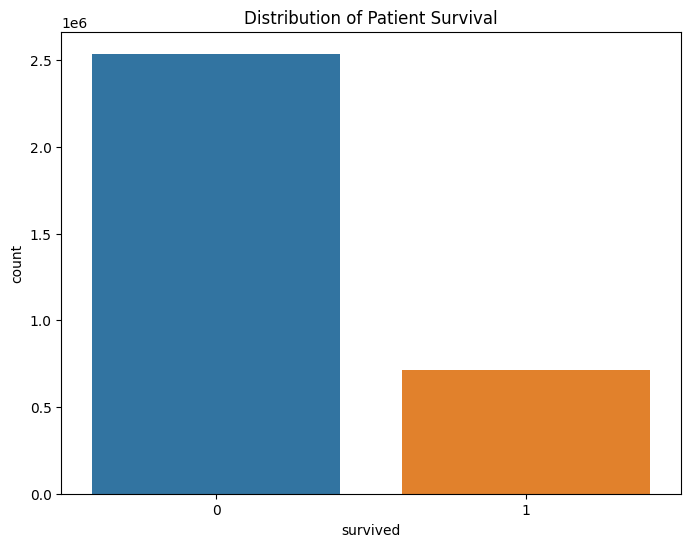

In [10]:
survived_counts = df['survived'].value_counts()
print(survived_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='survived')
plt.title('Distribution of Patient Survival')
plt.show()

Out of the total patients, approximately 78% did not survive, while 22% survived.\
This indicates a high mortality rate among lung cancer patients in this dataset.

#### `Correlation matrix`

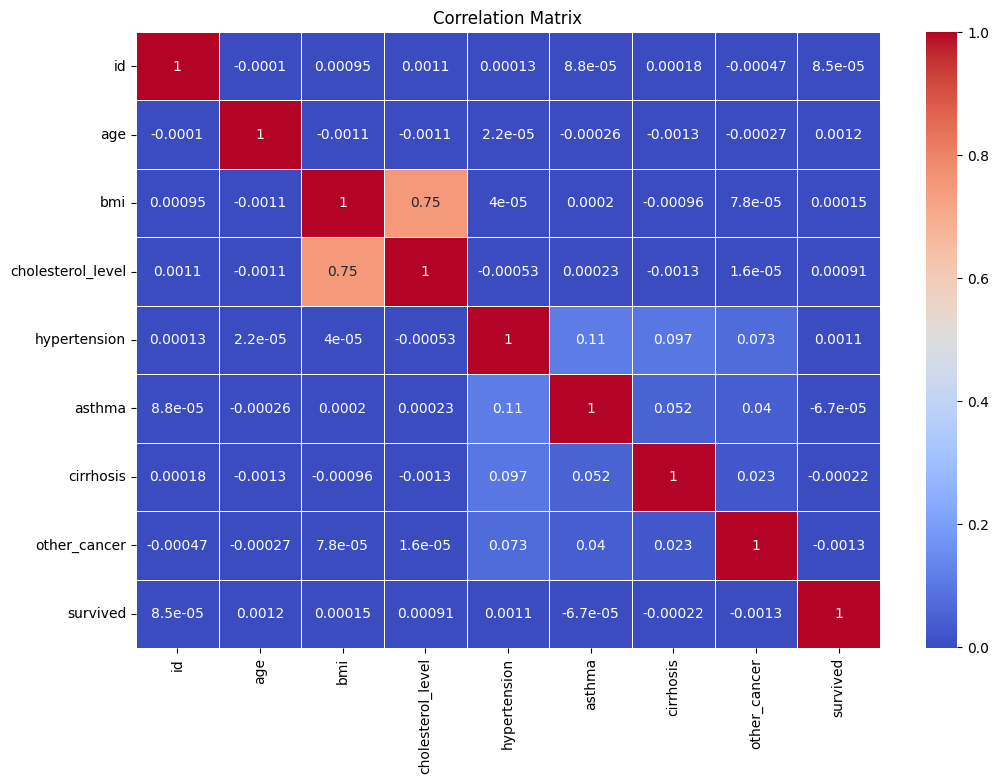

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The primary notable relationship in this dataset is the strong correlation between BMI and cholesterol level. Most other variable pairs show weak or no correlation, indicating that they do not have strong linear relationships with each other in this dataset.

## `Categorical Variables Analysis`

#### `Smoking status distribution`

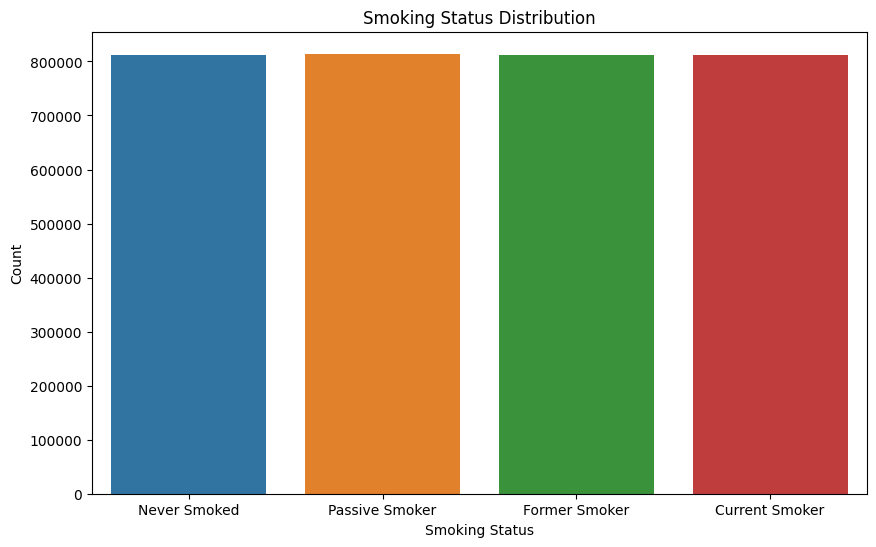

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = df['smoking_status'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


#### `Cancer stage distribution`

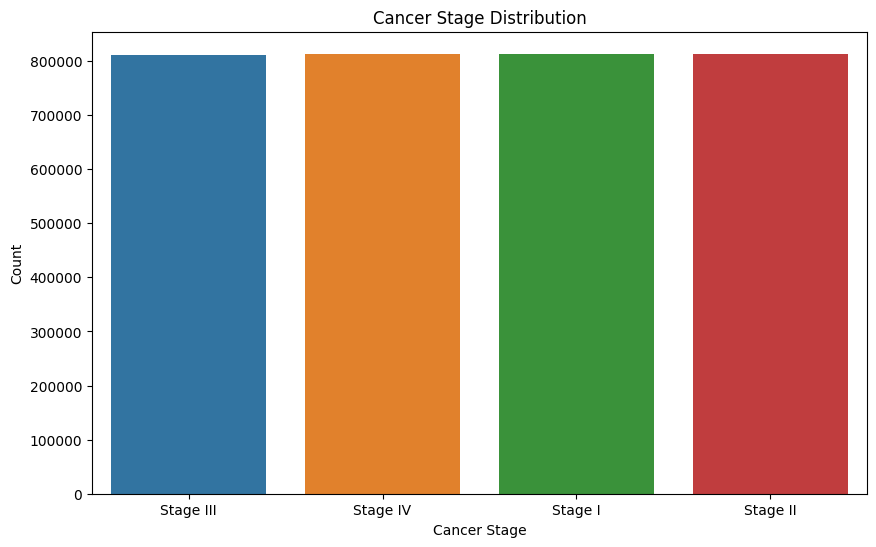

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = df['cancer_stage'])
plt.title('Cancer Stage Distribution')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()


## `Survival Analysis`

#### `Survival rate by cancer stage`

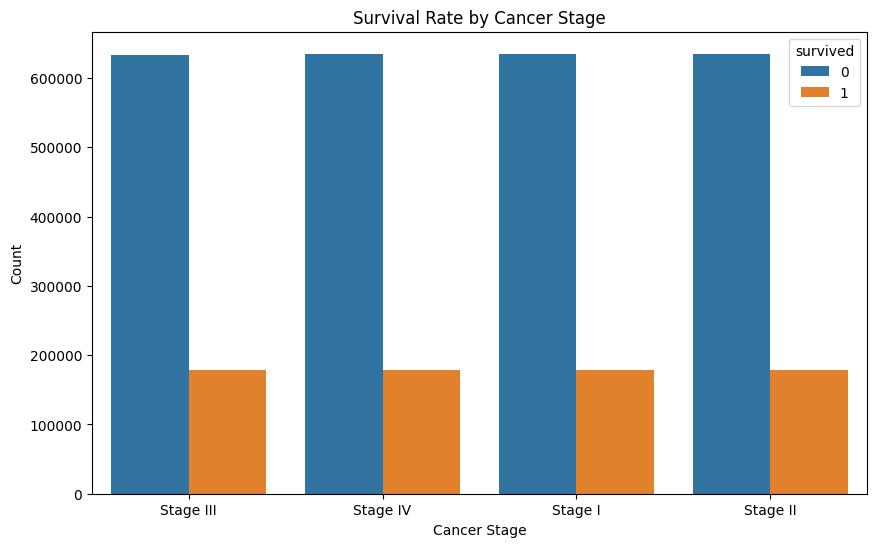

In [14]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cancer_stage', hue='survived')
plt.title('Survival Rate by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()




#### `Survival rate by treatment type`

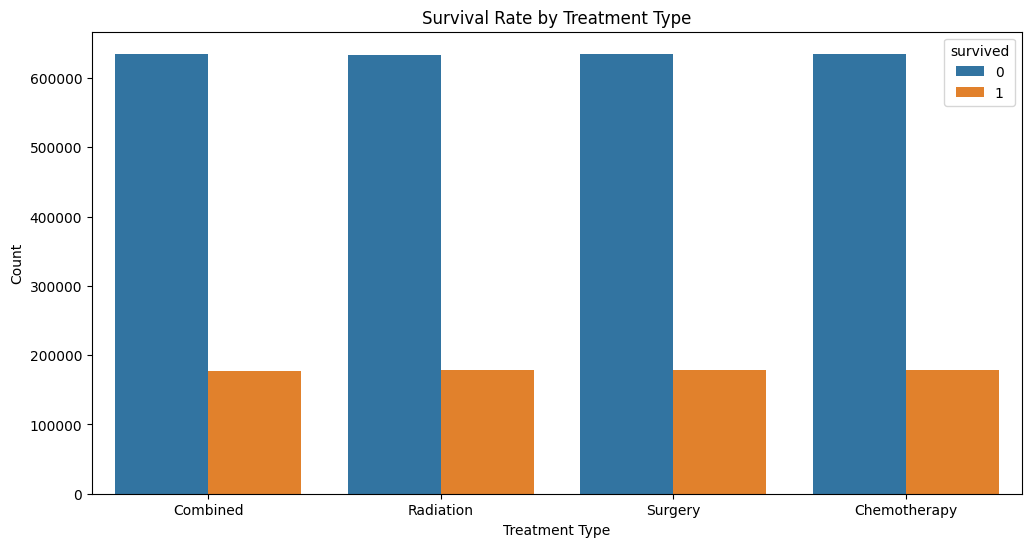

In [15]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='treatment_type', hue='survived')
plt.title('Survival Rate by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.show()

## `Summary and Insights`

#### `Summary statistics for survived patients`

In [16]:

print(df[df['survived'] == 1].describe())


                 id            age            bmi  cholesterol_level   
count  7.137020e+05  713702.000000  713702.000000      713702.000000  \
mean   1.625151e+06      55.022637      30.495128         233.711997   
std    9.379373e+05       9.996551       8.359222          43.437902   
min    4.000000e+00       4.000000      16.000000         150.000000   
25%    8.131570e+05      48.000000      23.300000         197.000000   
50%    1.625798e+06      55.000000      30.500000         242.000000   
75%    2.436399e+06      62.000000      37.700000         271.000000   
max    3.249996e+06     104.000000      45.000000         300.000000   

        hypertension         asthma      cirrhosis   other_cancer  survived  
count  713702.000000  713702.000000  713702.000000  713702.000000  713702.0  
mean        0.750735       0.468665       0.226411       0.087350       1.0  
std         0.432588       0.499017       0.418508       0.282348       0.0  
min         0.000000       0.000000    

#### `Summary statistics for non-survived patients`

In [17]:
print(df[df['survived'] == 0].describe())

                 id           age           bmi  cholesterol_level   
count  2.536298e+06  2.536298e+06  2.536298e+06       2.536298e+06  \
mean   1.624958e+06  5.499324e+01  3.049209e+01       2.336166e+02   
std    9.382668e+05  1.000253e+01  8.374946e+00       4.345148e+01   
min    1.000000e+00  6.000000e+00  1.600000e+01       1.500000e+02   
25%    8.123305e+05  4.800000e+01  2.320000e+01       1.960000e+02   
50%    1.624792e+06  5.500000e+01  3.050000e+01       2.420000e+02   
75%    2.437814e+06  6.200000e+01  3.770000e+01       2.710000e+02   
max    3.250000e+06  1.010000e+02  4.500000e+01       3.000000e+02   

       hypertension        asthma     cirrhosis  other_cancer   survived  
count  2.536298e+06  2.536298e+06  2.536298e+06  2.536298e+06  2536298.0  
mean   7.495850e-01  4.687458e-01  2.266315e-01  8.821795e-02        0.0  
std    4.332521e-01  4.990223e-01  4.186523e-01  2.836117e-01        0.0  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00        

## Model Training:

#### Data Encoding:

First, we need to handle the categorical data accordingly.\
For this purpose we can use different encoding techniques.

In [18]:
nominal = ['gender', 'country', 'family_history', 'smoking_status', 'treatment_type']

#one-hot encoding
df = pd.get_dummies(df, columns= nominal, drop_first=True)

#label encoding:
label_encoder = LabelEncoder()
df['cancer_stage'] = label_encoder.fit_transform(df['cancer_stage'])

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head()

,id,age,diagnosis_date,cancer_stage,beginning_of_treatment_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived,gender_Male,country_Belgium,country_Bulgaria,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,country_France,country_Germany,country_Greece,country_Hungary,country_Ireland,country_Italy,country_Latvia,country_Lithuania,country_Luxembourg,country_Malta,country_Netherlands,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,1,64.0,2016-04-07,2,2016-04-21,31.1,257,1,1,0,0,2017-11-15,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,2,50.0,2023-04-22,2,2023-05-02,25.9,208,1,0,0,0,2024-04-25,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False
2,3,65.0,2023-04-07,3,2023-04-12,18.9,193,0,0,0,0,2025-03-11,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,4,51.0,2016-02-07,2,2016-02-13,34.6,249,1,1,1,0,2017-04-14,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
4,5,37.0,2023-12-01,0,2023-12-03,40.2,262,0,0,0,0,2024-09-20,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


Let's drop the columns that does not have any significance in the survival prediction.

In [20]:
df = df.drop(columns=['id','diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date'])

In [21]:
df.head()

,age,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Male,country_Belgium,country_Bulgaria,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,country_France,country_Germany,country_Greece,country_Hungary,country_Ireland,country_Italy,country_Latvia,country_Lithuania,country_Luxembourg,country_Malta,country_Netherlands,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,64.0,2,31.1,257,1,1,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,50.0,2,25.9,208,1,0,0,0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False
2,65.0,3,18.9,193,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
3,51.0,2,34.6,249,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
4,37.0,0,40.2,262,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False


#### Data Normalization:

In [22]:
X = df.drop(columns =  ['survived'])
y = df['survived']

In [23]:
standard_scaler = StandardScaler()
X_normalized_standard = standard_scaler.fit_transform(X)

In [24]:
X_normalized_standard_df = pd.DataFrame(X_normalized_standard, columns=X.columns)
X_normalized_standard_df.head()

,age,cancer_stage,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,gender_Male,country_Belgium,country_Bulgaria,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Estonia,country_Finland,country_France,country_Germany,country_Greece,country_Hungary,country_Ireland,country_Italy,country_Latvia,country_Lithuania,country_Luxembourg,country_Malta,country_Netherlands,country_Poland,country_Portugal,country_Romania,country_Slovakia,country_Slovenia,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,0.899921,0.447675,0.072537,0.537704,0.577600,1.064628,-0.541261,-0.310683,-0.999699,-0.196215,-0.196053,-0.196203,-0.196473,-0.196207,-0.196402,-0.196131,-0.196106,-0.195955,5.099182,-0.196360,-0.195904,-0.195976,-0.196315,-0.196603,-0.196102,-0.196057,-0.196473,-0.195987,-0.196052,-0.195639,-0.196037,-0.196,-0.195495,-0.196095,-0.196167,-1.000584,-0.577238,1.733298,-0.578198,1.733395,-0.577238,-0.577815
1,-0.499908,0.447675,-0.548619,-0.590068,0.577600,-0.939295,-0.541261,-0.310683,1.000302,-0.196215,-0.196053,-0.196203,-0.196473,5.096654,-0.196402,-0.196131,-0.196106,-0.195955,-0.196110,-0.196360,-0.195904,-0.195976,-0.196315,-0.196603,-0.196102,-0.196057,-0.196473,-0.195987,-0.196052,-0.195639,-0.196037,-0.196,-0.195495,-0.196095,-0.196167,0.999416,-0.577238,-0.576935,1.729512,-0.576903,1.732388,-0.577815
2,0.999909,1.341785,-1.384790,-0.935305,-1.731301,-0.939295,-0.541261,-0.310683,1.000302,-0.196215,-0.196053,-0.196203,-0.196473,-0.196207,-0.196402,-0.196131,-0.196106,-0.195955,-0.196110,-0.196360,-0.195904,-0.195976,-0.196315,-0.196603,-0.196102,-0.196057,-0.196473,-0.195987,-0.196052,-0.195639,5.101074,-0.196,-0.195495,-0.196095,-0.196167,-1.000584,-0.577238,1.733298,-0.578198,-0.576903,-0.577238,1.730659
3,-0.399921,0.447675,0.490622,0.353578,0.577600,1.064628,1.847537,-0.310683,-0.999699,-0.196215,-0.196053,-0.196203,-0.196473,-0.196207,-0.196402,-0.196131,-0.196106,-0.195955,-0.196110,-0.196360,-0.195904,-0.195976,-0.196315,5.086381,-0.196102,-0.196057,-0.196473,-0.195987,-0.196052,-0.195639,-0.196037,-0.196,-0.195495,-0.196095,-0.196167,0.999416,1.732386,-0.576935,-0.578198,-0.576903,-0.577238,1.730659
4,-1.799750,-1.340546,1.159559,0.652782,-1.731301,-0.939295,-0.541261,-0.310683,1.000302,-0.196215,-0.196053,-0.196203,-0.196473,-0.196207,-0.196402,-0.196131,-0.196106,-0.195955,-0.196110,5.092682,-0.195904,-0.195976,-0.196315,-0.196603,-0.196102,-0.196057,-0.196473,-0.195987,-0.196052,-0.195639,-0.196037,-0.196,-0.195495,-0.196095,-0.196167,0.999416,-0.577238,1.733298,-0.578198,-0.576903,-0.577238,-0.577815


**Model Training:**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_standard_df, y, test_size=0.2, random_state=42)

**Using Random Forest Model:**

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

predicted_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Initialize variables
step_factor = 0.05
threshold_values = np.arange(0.2, 0.81, step_factor)
roc_scores = []

for threshold in threshold_values:
    predicted = (predicted_proba >= threshold).astype('int')
    roc_score = roc_auc_score(y_test, predicted)
    print(f'Threshold {threshold:.2f} -- ROC AUC: {roc_score:.4f}')
    roc_scores.append(roc_score)

# Find the best threshold
best_index = np.argmax(roc_scores)
best_threshold = threshold_values[best_index]
best_roc_score = roc_scores[best_index]

print(f'--- Optimum Threshold --- {best_threshold:.2f} -- ROC AUC: {best_roc_score:.4f}')

# Apply the best threshold to make final classifications
final_predictions = (predicted_proba >= best_threshold).astype('int')

# Evaluate the final classifications
final_accuracy = accuracy_score(y_test, final_predictions)
print(f'Final accuracy with optimal threshold {best_threshold:.2f}: {final_accuracy:.4f}')

Threshold 0.20 -- ROC AUC: 0.5003
Threshold 0.25 -- ROC AUC: 0.5003
Threshold 0.30 -- ROC AUC: 0.5004
Threshold 0.35 -- ROC AUC: 0.5003
Threshold 0.40 -- ROC AUC: 0.5003
Threshold 0.45 -- ROC AUC: 0.5000
Threshold 0.50 -- ROC AUC: 0.5000
Threshold 0.55 -- ROC AUC: 0.5000
Threshold 0.60 -- ROC AUC: 0.4999
Threshold 0.65 -- ROC AUC: 0.5000
Threshold 0.70 -- ROC AUC: 0.5000
Threshold 0.75 -- ROC AUC: 0.5000
Threshold 0.80 -- ROC AUC: 0.5000
--- Optimum Threshold --- 0.30 -- ROC AUC: 0.5004
Final accuracy with optimal threshold 0.30: 0.6748


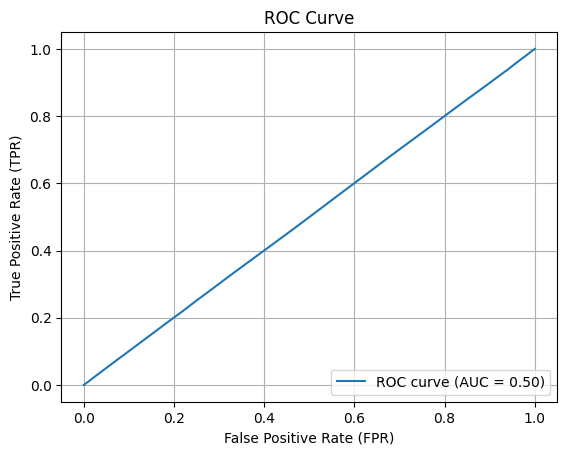

In [27]:
# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba)

# Optional: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, predicted_proba))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
predictions = rf_model.predict(X_test)
predicted_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Also calculate accuracy and ROC AUC score for completeness
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predicted_proba)

In [36]:
# Print the results
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 77.73%


#### Conclusion:

This random forest model gives us almost **78% accuracy** on test data.\
The model doesn't give perfect predictions but it works good on unknown data.